### Global Power Plant Database

#### Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

1. country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
2. country_long (text): longer form of the country designation
3. name (text): name or title of the power plant, generally in Romanized form
4. gppd_idnr (text): 10 or 12 character identifier for the power plant
5. capacity_mw (number): electrical generating capacity in megawatts
6. latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
7. longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
8. primary_fuel (text): energy source used in primary electricity generation or export
9. other_fuel1 (text): energy source used in electricity generation or export
10. other_fuel2 (text): energy source used in electricity generation or export
11. other_fuel3 (text): energy source used in electricity generation or export
12. commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
13. owner (text): majority shareholder of the power plant, generally in Romanized form
14. source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
15. url (text): web document corresponding to the `source` field
16. geolocation_source (text): attribution for geolocation information
17. wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
18. year_of_capacity_data (number): year the capacity information was reported
19. generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
20. generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
21. generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
22. generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
23. generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
24. generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
25. generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
26. generation_data_source (text): attribution for the reported generation information
27. estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
28. estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014 
29. estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015 
30. estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016 
31. estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017 
32. estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
33. estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014 
34. estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
35. estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
36. estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
#loading the dataset
pp_data = pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
pp_data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
pp_data.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# checking for column names and dimensions
print(pp_data.columns)
print()
print("Shape of the Dataset :", pp_data.shape)

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Shape of the Dataset : (907, 27)


The dataset contains details about 907 different power plants with their capacaity and other information(27 columns).

In [5]:
# summary of the dataset
pp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

The dataset conatins two types of datatypes float(numerical) and object(categorical). There are few column that have only null values(estimated_generation_gwh, generation_gwh_2019, generation_gwh_2013, wepp_id, other_fuel2, other_fuel3). We will drop those columns.

In [6]:
# dropping columns
# country and country_long represent the same thing and are no necessary. we will drop these as well
pp_data = pp_data.drop(['estimated_generation_gwh', 'generation_gwh_2019', 'generation_gwh_2013', 'wepp_id', 
                        'other_fuel2', 'other_fuel3', 'country', 'country_long'], axis=1)
pp_data.shape

(907, 19)

6 columns are dropped.

In [7]:
pp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,861.0,21.197918,6.239612,8.1689,16.773900,21.780000,25.512400,34.649
longitude,861.0,77.464907,4.939316,68.6447,74.256200,76.719500,79.440800,95.408
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000
generation_gwh_2016,434.0,2467.936859,4162.884308,0.0000,188.285252,737.205450,3282.861313,30015.000
generation_gwh_2017,440.0,2547.759305,4196.991169,0.0000,177.874930,817.977250,3275.690475,35116.000
generation_gwh_2018,448.0,2600.804099,4314.880456,0.0000,193.378250,751.644375,3143.535900,35136.000


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


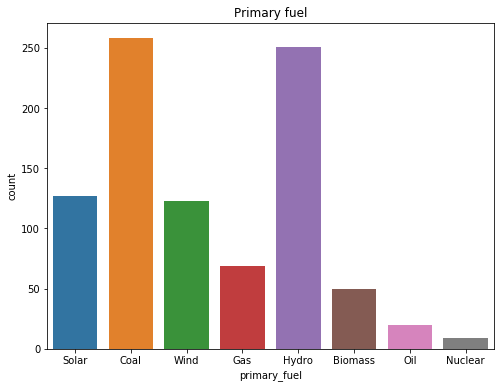

In [8]:
# kind of power plant based on primary fuel

print(pp_data['primary_fuel'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x=pp_data['primary_fuel'], data=pp_data)
plt.title('Primary fuel')
plt.show()

Most of the plants are coal based followed by hydro. Only 9 plants are nuclear based.

In [9]:
# we will fill null values in the following column to 0

columns_to_fill_with_zero = ['commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
                             'generation_gwh_2017','generation_gwh_2018','year_of_capacity_data']
pp_data[columns_to_fill_with_zero] = pp_data[columns_to_fill_with_zero].fillna(0)

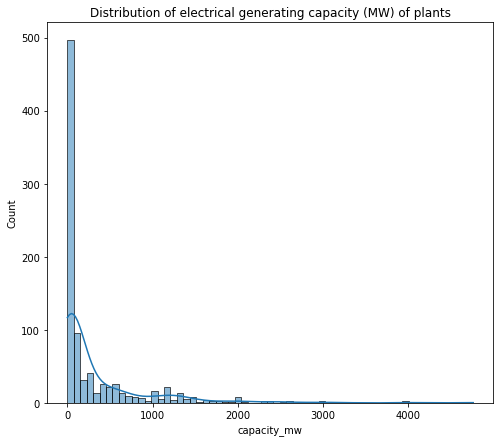

In [10]:
plt.figure(figsize=(8,7))
plt.title("Distribution of electrical generating capacity (MW) of plants")
sns.histplot(x='capacity_mw', data=pp_data, kde=True)
plt.show()

Most of the plants have capacity less than 1000MW.

0.0       380
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1939.0      1
1927.0      1
1956.0      1
1949.0      1
1969.0      1
Name: commissioning_year, Length: 74, dtype: int64


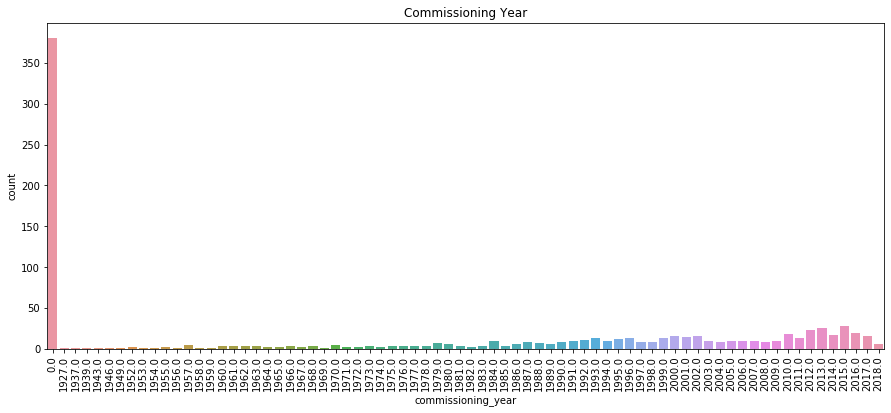

In [11]:
# How old are the plants?

print(pp_data['commissioning_year'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(x=pp_data['commissioning_year'], data=pp_data)
plt.title('Commissioning Year')
plt.xticks(rotation=90)
plt.show()

1. A lot of plants have 0 as the commisioning year which can be the unknown year.
2. Few of the plants are over 90 years old.

In [12]:
# summing the total generated electricity from 2014 -2018 and dropping those columns

pp_data['Total_generation'] = pp_data[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
                             'generation_gwh_2017','generation_gwh_2018']].sum(axis=1)

In [13]:
pp_data = pp_data.drop(['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
                             'generation_gwh_2017','generation_gwh_2018'], axis=1)
pp_data.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_data_source,Total_generation
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0.0,NaN,0.000000
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,0.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,0.0,NaN,0.000000
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,0.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0.0,NaN,0.000000
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority,3637.554320
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority,27859.499736


In [14]:
## kind of reporting source 
pp_data['source'].value_counts()

Central Electricity Authority                519
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
S Limited Rsolar                               1
Bannari Sugars ltd                             1
EMC Limited                                    1
Uttam Steels ltd                               1
Powers Private                                 1
Name: source, Length: 191, dtype: int64

There are 191 different sources.

In [15]:
pp_data['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

We have only 1 data generating source. We will impute this value for the null values as well.

In [16]:
pp_data['generation_data_source'] = pp_data['generation_data_source'].fillna('Central Electricity Authority')

# counting the missing values
pp_data['generation_data_source'].value_counts()

Central Electricity Authority    907
Name: generation_data_source, dtype: int64

In [17]:
pp_data['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

Since WRI is the most common geolocation source value, we will fill the null values with the same.

In [18]:
pp_data['geolocation_source'] = pp_data['geolocation_source'].fillna('WRI')

# counting the missing values
pp_data['geolocation_source'].value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [19]:
pp_data['owner'].value_counts()

Acc Acc ltd                                 4
Sterling Agro Industries ltd.               4
Jk Cement ltd                               4
Shree Naman Developers Ltd.                 3
Shree Sugars ltd                            3
                                           ..
Bhilwara Energy Limited                     1
Northwest Energy Private Limited (NWEPL)    1
Ideal Projects ltd                          1
Greta Energy ltd                            1
EMC Limited                                 1
Name: owner, Length: 280, dtype: int64

In [20]:
# dropping few columns again
pp_data = pp_data.drop(['owner','source','url','name','gppd_idnr','other_fuel1'],axis=1)
pp_data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_data_source,Total_generation
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,0.0,Central Electricity Authority,0.000000
1,98.0,24.7663,74.6090,Coal,0.0,WRI,0.0,Central Electricity Authority,0.000000
2,39.2,21.9038,69.3732,Wind,0.0,WRI,0.0,Central Electricity Authority,0.000000
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,Central Electricity Authority,3637.554320
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,Central Electricity Authority,27859.499736


Total installed capacity of all plants(MW):  295884.946


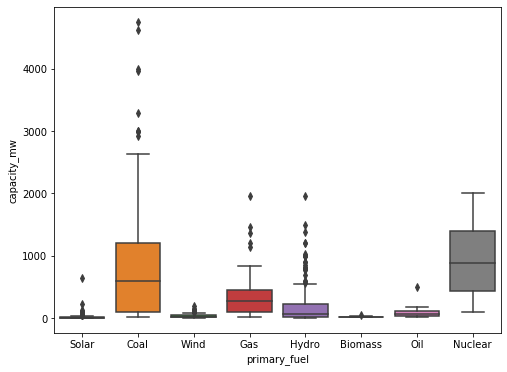

In [21]:
print("Total installed capacity of all plants(MW): ",pp_data['capacity_mw'].sum())
# capacity vs primary fuel
plt.figure(figsize=(8,6))
sns.boxplot(data=pp_data, x='primary_fuel', y='capacity_mw')
plt.show()

Nuclear and Coal power plants have the highest total capacity while biomass,solar and wind have the lowest.

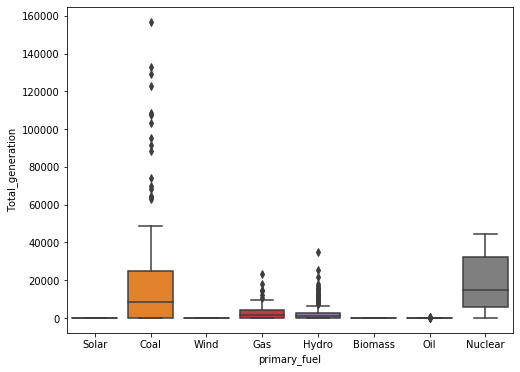

In [22]:

# total_generation vs primary fuel
plt.figure(figsize=(8,6))
sns.boxplot(data=pp_data, x='primary_fuel', y='Total_generation')
plt.show()

Coal power plants generated the hoghest amount of electricity.

In [23]:
pp_data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_data_source,Total_generation
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,0.0,Central Electricity Authority,0.000000
1,98.0,24.7663,74.6090,Coal,0.0,WRI,0.0,Central Electricity Authority,0.000000
2,39.2,21.9038,69.3732,Wind,0.0,WRI,0.0,Central Electricity Authority,0.000000
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,Central Electricity Authority,3637.554320
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,Central Electricity Authority,27859.499736


In [24]:
# checking null values
pp_data.isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year         0
geolocation_source         0
year_of_capacity_data      0
generation_data_source     0
Total_generation           0
dtype: int64